In [3]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [4]:
# Load the dataset
df = pd.read_csv('vgsales.csv')
df

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


In [5]:
# Remove unnecessary columns
df = df.drop(columns=['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'])

In [6]:
# Check for missing values and handle them
print(df.isnull().sum())

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
Global_Sales      0
dtype: int64


In [7]:
# Fill missing values for 'Year' and 'Publisher'
df['Year'].fillna(df['Year'].mode()[0], inplace=True)
df['Publisher'].fillna(df['Publisher'].mode()[0], inplace=True)

C:\Users\kongs\AppData\Local\Temp\ipykernel_13704\365034507.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Year'].fillna(df['Year'].mode()[0], inplace=True)
C:\Users\kongs\AppData\Local\Temp\ipykernel_13704\365034507.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For 

In [8]:
# Summary statistics
summary_stats = df.describe()
print(summary_stats)

               Rank          Year  Global_Sales
count  16598.000000  16598.000000  16598.000000
mean    8300.605254   2006.448789      0.537441
std     4791.853933      5.790533      1.555028
min        1.000000   1980.000000      0.010000
25%     4151.250000   2003.000000      0.060000
50%     8300.500000   2007.000000      0.170000
75%    12449.750000   2010.000000      0.470000
max    16600.000000   2020.000000     82.740000


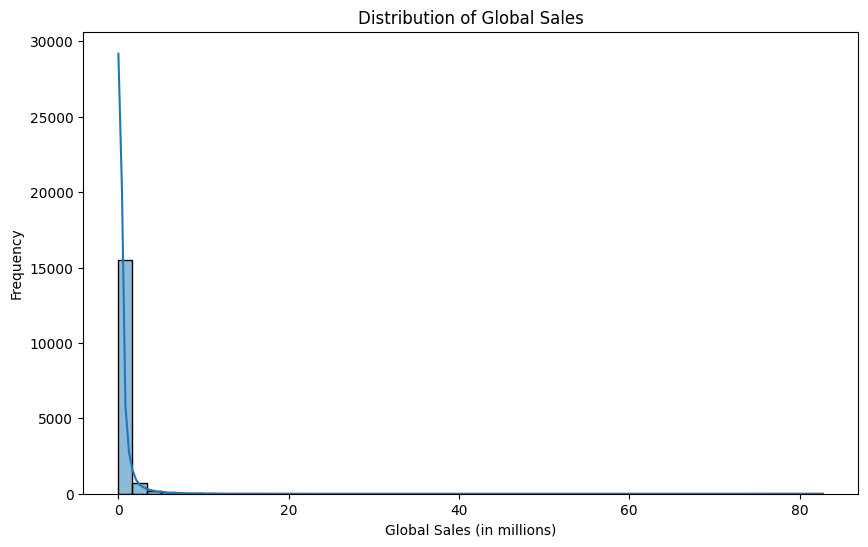

In [9]:
# Distribution of Global Sales
plt.figure(figsize=(10, 6))
sns.histplot(df['Global_Sales'], bins=50, kde=True)
plt.title('Distribution of Global Sales')
plt.xlabel('Global Sales (in millions)')
plt.ylabel('Frequency')
plt.show()

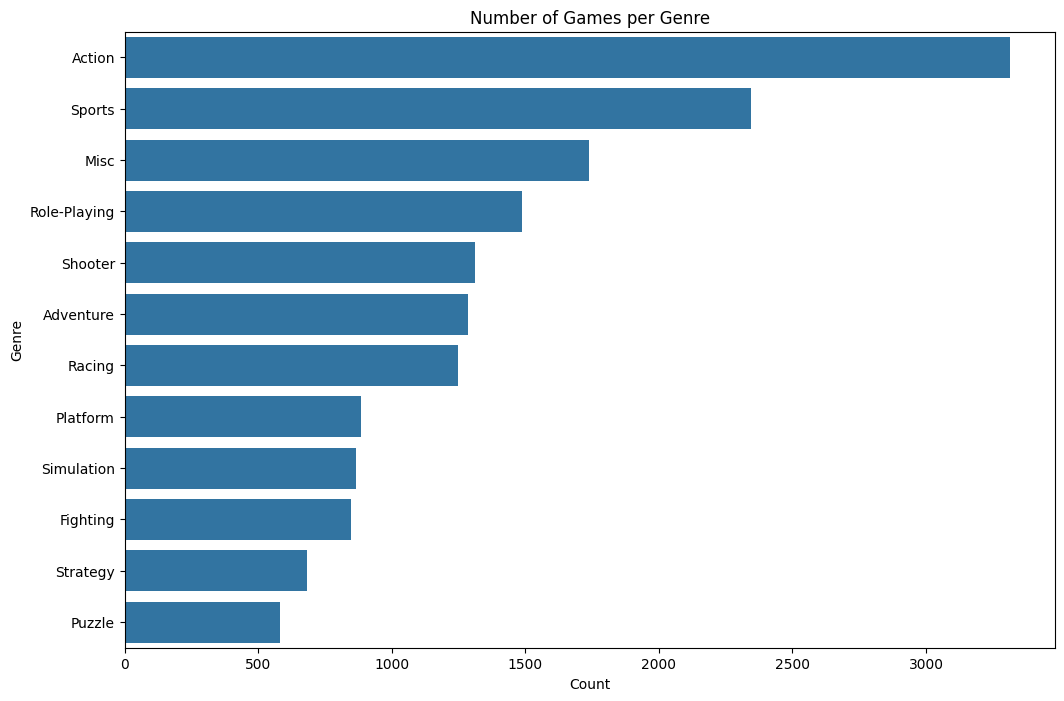

In [10]:
# Number of games per genre
plt.figure(figsize=(12, 8))
sns.countplot(y=df['Genre'], order=df['Genre'].value_counts().index)
plt.title('Number of Games per Genre')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.show()

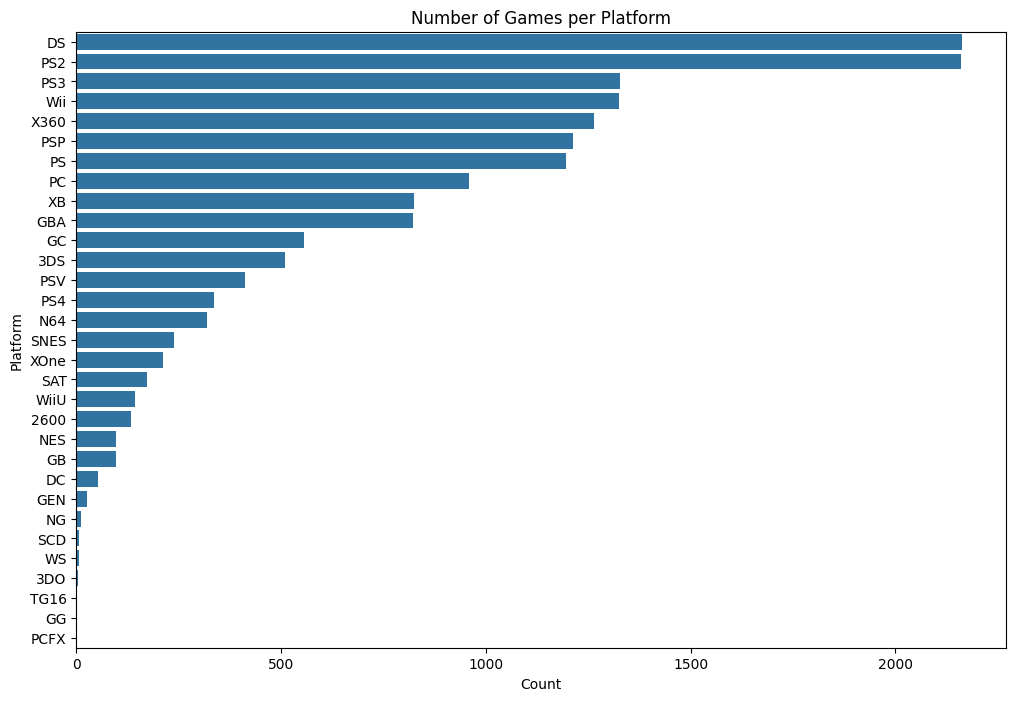

In [11]:
# Number of games per platform
plt.figure(figsize=(12, 8))
sns.countplot(y=df['Platform'], order=df['Platform'].value_counts().index)
plt.title('Number of Games per Platform')
plt.xlabel('Count')
plt.ylabel('Platform')
plt.show()

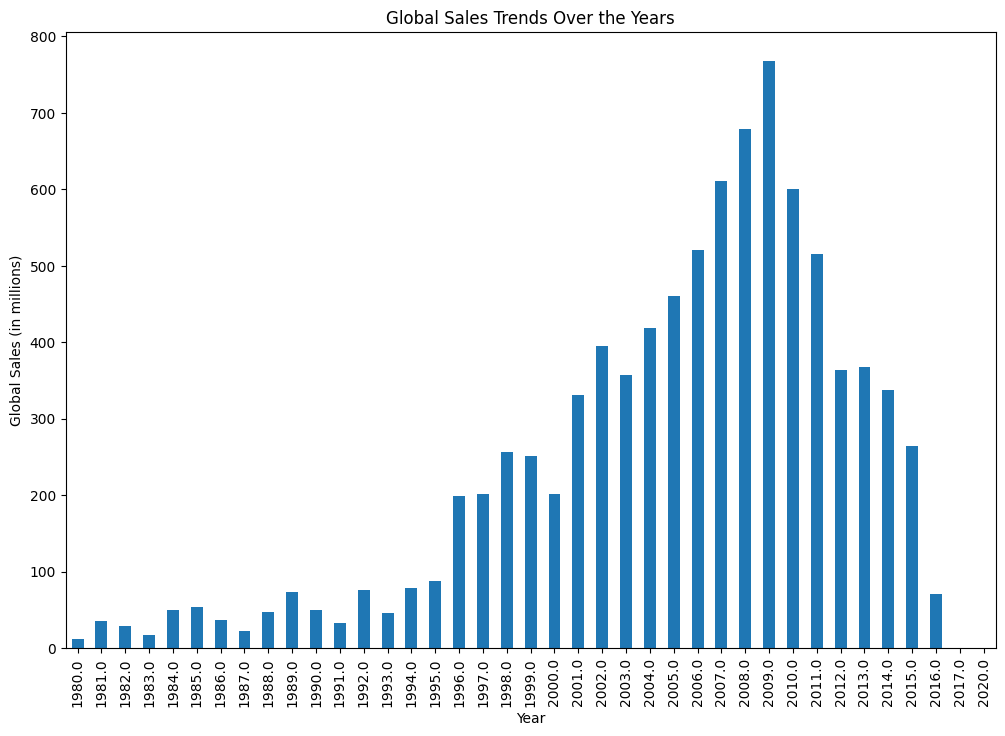

In [12]:
# Sales trends over the years
plt.figure(figsize=(12, 8))
df.groupby('Year')['Global_Sales'].sum().plot(kind='bar')
plt.title('Global Sales Trends Over the Years')
plt.xlabel('Year')
plt.ylabel('Global Sales (in millions)')
plt.show()

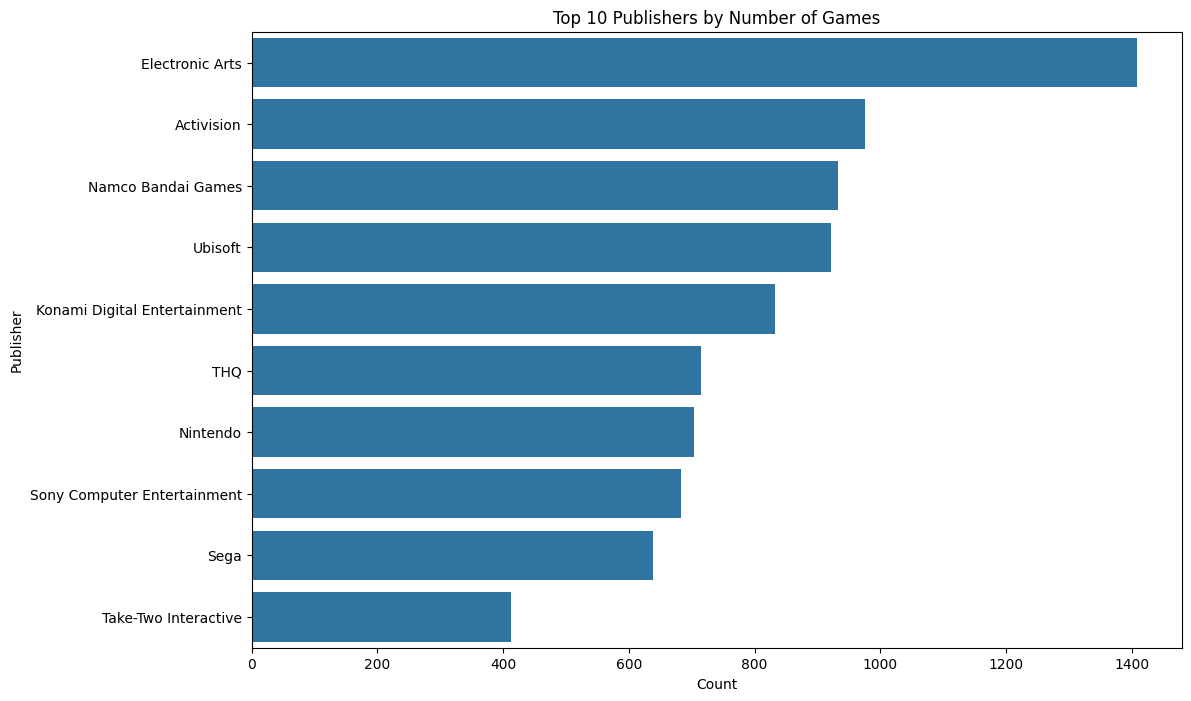

In [13]:
# Top 10 publishers by number of games
plt.figure(figsize=(12, 8))
sns.countplot(y=df['Publisher'], order=df['Publisher'].value_counts().index[:10])
plt.title('Top 10 Publishers by Number of Games')
plt.xlabel('Count')
plt.ylabel('Publisher')
plt.show()

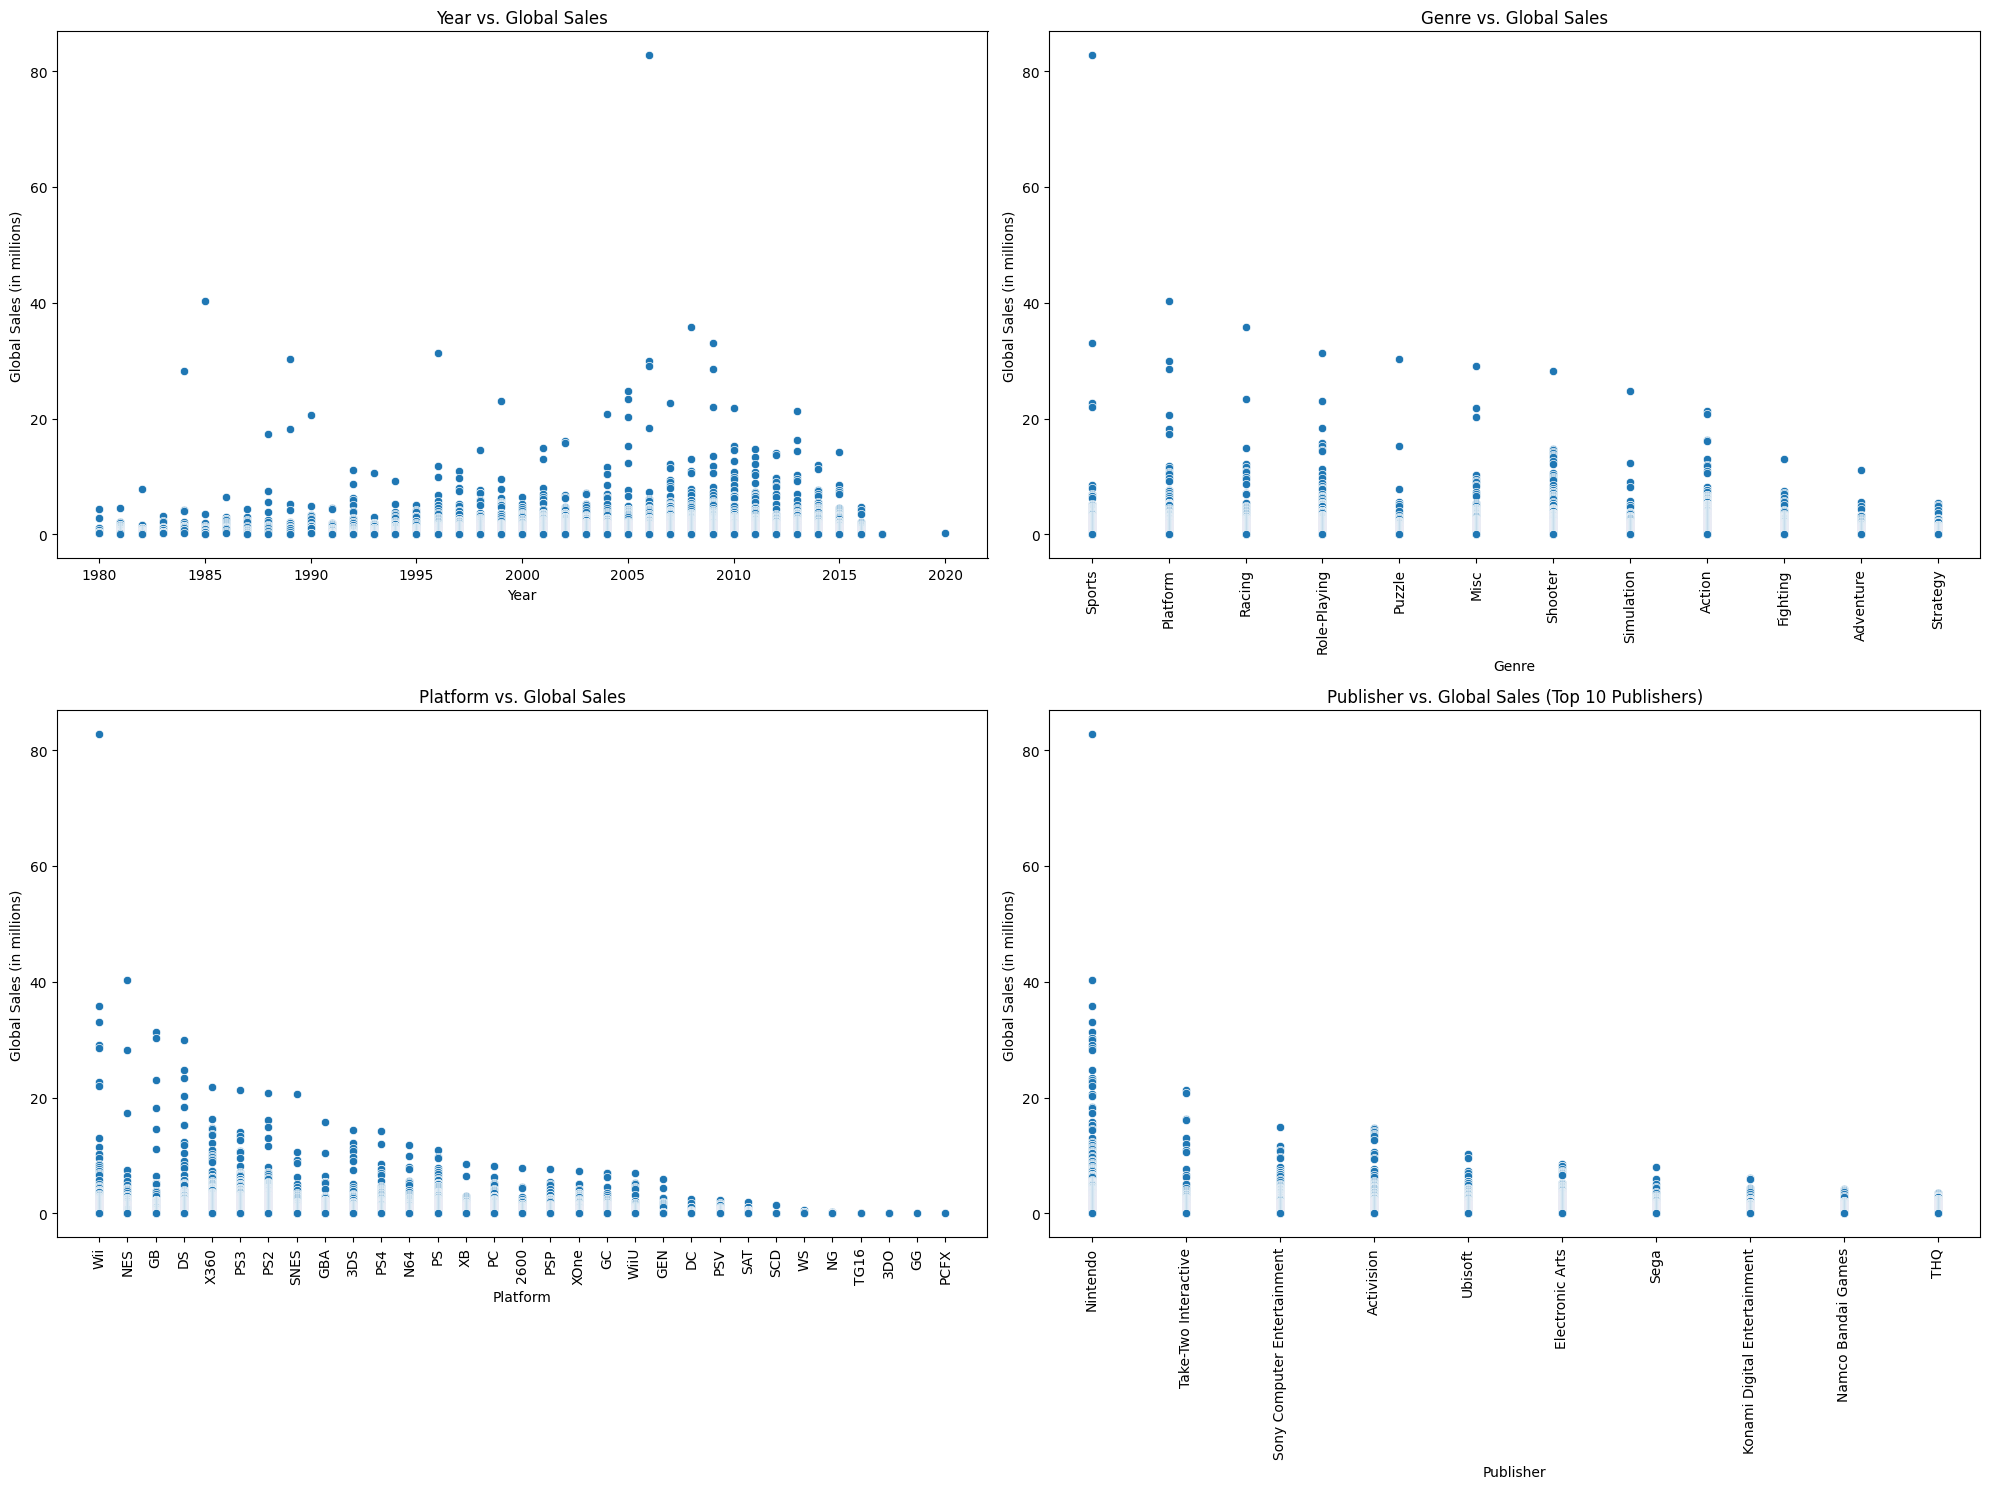

In [14]:

# Convert 'Year' to numeric (in case it's not)
df['Year'] = pd.to_numeric(df['Year'], errors='coerce')

# Create subplots
fig, axs = plt.subplots(2, 2, figsize=(20, 15))

# Scatter plot for Year vs. Global Sales
sns.scatterplot(x='Year', y='Global_Sales', data=df, ax=axs[0, 0])
axs[0, 0].set_title('Year vs. Global Sales')
axs[0, 0].set_xlabel('Year')
axs[0, 0].set_ylabel('Global Sales (in millions)')

# Scatter plot for Genre vs. Global Sales
sns.scatterplot(x='Genre', y='Global_Sales', data=df, ax=axs[0, 1])
axs[0, 1].set_title('Genre vs. Global Sales')
axs[0, 1].set_xlabel('Genre')
axs[0, 1].set_ylabel('Global Sales (in millions)')
axs[0, 1].tick_params(axis='x', rotation=90)

# Scatter plot for Platform vs. Global Sales
sns.scatterplot(x='Platform', y='Global_Sales', data=df, ax=axs[1, 0])
axs[1, 0].set_title('Platform vs. Global Sales')
axs[1, 0].set_xlabel('Platform')
axs[1, 0].set_ylabel('Global Sales (in millions)')
axs[1, 0].tick_params(axis='x', rotation=90)

# Scatter plot for Publisher vs. Global Sales (Top 10 Publishers)
top_publishers = df['Publisher'].value_counts().index[:10]
sns.scatterplot(x='Publisher', y='Global_Sales', data=df[df['Publisher'].isin(top_publishers)], ax=axs[1, 1])
axs[1, 1].set_title('Publisher vs. Global Sales (Top 10 Publishers)')
axs[1, 1].set_xlabel('Publisher')
axs[1, 1].set_ylabel('Global Sales (in millions)')
axs[1, 1].tick_params(axis='x', rotation=90)

# Adjust layout
plt.tight_layout()
plt.show()

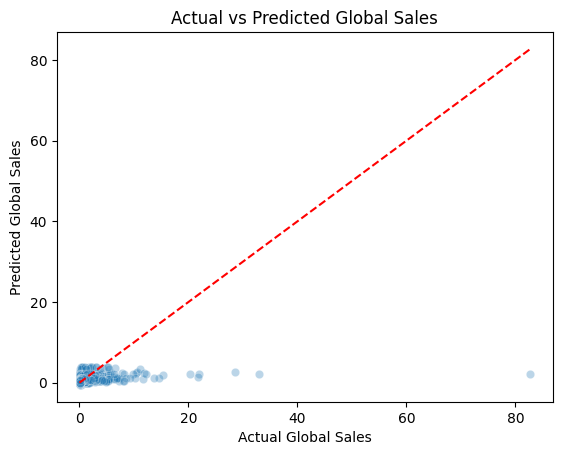

Mean Squared Error: 3.8344355267139703
R-squared: 0.0873355538322601


In [15]:
# Selecting the features and the target variable
features = ['Platform', 'Genre', 'Publisher']
target = 'Global_Sales'

# Splitting the dataset into training and testing sets
X = df[features]
y = df[target]

# Handling missing values and encoding categorical variables
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), features)
    ])

# Creating a pipeline that first preprocesses the data and then applies Linear Regression
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('regressor', LinearRegression())])

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training the model
model.fit(X_train, y_train)

# Making predictions
y_pred = model.predict(X_test)

# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Plotting Actual vs Predicted Global Sales
sns.scatterplot(x=y_test, y=y_pred, alpha=0.3)
plt.plot([0, max(y_test)], [0, max(y_test)], color='red', linestyle='--')
plt.xlabel('Actual Global Sales')
plt.ylabel('Predicted Global Sales')
plt.title('Actual vs Predicted Global Sales')
plt.show()

print("Mean Squared Error:", mse)
print("R-squared:", r2)